In this notebook, we build a simple linear regressin using sklearn

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [64]:
df = pd.read_csv('1.01. Simple linear regression.csv')

In [65]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [66]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Create the Regression Model

In [67]:
x = df['SAT']
y = df['GPA']

In [68]:
x.shape, y.shape

((84,), (84,))

In [69]:
## Let's reshape our 1d array shapeof data into a metrix
x_metrix = x.values.reshape(-1, 1)
x_metrix.shape

(84, 1)

In [70]:
reg =  LinearRegression()

In [71]:
reg.fit(x_metrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Notes on Parameters

**Standardization:** Is a type of **normalization** that substracts the mean and divides the standard deviation.

**Normalization:** In this case, subtract teh mean but divides by the L1-norm of the inputs


**Copy X:** When sets to True, copies the inputs before fitting.

**fit_intercept:** Takes care of the constant.

**n_jobs:** Is a parameter used when we want to parallelize routines

## R-squared
We print the R-squared of a regression model in Sklearn

In [72]:
reg.score(x_metrix,y)

0.40600391479679765

In [73]:
# Find the Coefficients in Sklearn
#the erseult is a coeffientt value of the x variable
reg.coef_

array([0.00165569])

In [74]:
# Intercept
# A simple regesion always has a single intercept
reg.intercept_

0.2750402996602803

## Making Predictions

In [77]:
prediction = reg.predict(x_metrix)

array([3.11288962, 3.03010522, 3.18905127, 3.06487466, 3.07812017,
       3.04003934, 3.19567402, 3.19567402, 3.24203329, 3.33806319,
       3.14765907, 3.21388659, 3.14765907, 3.10957824, 3.21057521,
       3.37448833, 3.18077283, 3.0466621 , 3.32481769, 3.23209916,
       3.19070696, 3.12613512, 3.02844953, 3.06818604, 3.54336851,
       3.29832668, 3.23375485, 3.29004824, 3.61953016, 3.24534466,
       3.20395246, 3.47714099, 3.21388659, 3.34634163, 3.38773383,
       3.3364075 , 3.26852429, 3.51025475, 3.21719796, 3.30660512,
       3.36289851, 3.33806319, 3.53012301, 3.09302136, 3.56985952,
       3.4622398 , 3.2950153 , 3.51356613, 3.34965301, 3.55164695,
       3.25859017, 3.34634163, 3.43243741, 2.98043457, 3.38607815,
       3.39932365, 3.13938063, 3.50859906, 3.22382072, 3.4059464 ,
       3.52681163, 3.26852429, 3.40925778, 3.65429961, 3.40925778,
       3.30826081, 3.33806319, 3.47714099, 3.35627576, 3.47217392,
       3.4754853 , 3.21885365, 3.5450242 , 3.47714099, 3.62118

In [81]:
df['predicted_GPA'] = reg.predict(x_metrix)

In [85]:
df.head(20)

,SAT,GPA,predicted_GPA
0,1714,2.40,3.112890
1,1664,2.52,3.030105
2,1760,2.54,3.189051
3,1685,2.74,3.064875
4,1693,2.83,3.078120
5,1670,2.91,3.040039
6,1764,3.00,3.195674
7,1764,3.00,3.195674
8,1792,3.01,3.242033
9,1850,3.01,3.338063


## Ploting the REgression

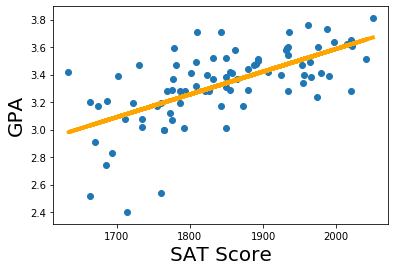

In [92]:
plt.scatter(x, y)
yhat = reg.coef_*x_metrix + reg.intercept_
fig = plt.plot(x, yhat, lw=4, c='orange', label='Regression Line')
plt.ylabel('GPA', fontsize=20)
plt.xlabel('SAT Score', fontsize=20)
plt.show()

https://en.wikipedia.org/wiki/Feature_scaling
http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/

## Multiple Linear Regression with Sklearn


In [124]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [167]:
data.head()

raw_df = data.copy()

In [168]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [169]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [170]:
reg = LinearRegression()

In [171]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [173]:
reg.intercept_

0.29603261264909486

## Calculating Adjusted R-squared

In [174]:
reg.score(x,y).round(3)

0.407

## Formula for Adjusted R squared

Since there is no method that calcualtes the adjusted R2 in python, we create the formula manually.

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = 84(the number of observations)

p = 2 (the number of predictors)

In [175]:
x.shape

(84, 2)

In [176]:
r2 = reg.score(x,y)

n = x.shape[0]

p = x.shape[1]

adjustedr2 = 1-(1-r2)*(n-1)/(n-p-1)

adjustedr2 

0.39203134825134023

## Feature Selection through p-values (F-regression)

How to detect variables which are unneded in a model

Disregard p values with valeus > 0.05

F-regression creates simple linear regressions of each feature and the dependent variable

In [177]:
from sklearn.feature_selection import f_regression

In [178]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

The first values correspond to the F-statistics arrays while the second = p-values

In [179]:
p_values = f_regression(x,y)[1]
p_values.round(3)

array([0.   , 0.676])

As suggested in the previous lecture, the F-regression does not take into account the interrelation of the features.

A not so simple fix for that is to ammend the LinearRegression() class.

## Creating a summary Table

In [180]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [181]:
reg_summary['Coefficents'] = reg.coef_ 
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficents,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


## Feature Scaling

Feature scaling or standardization is the process of transforming the data into a standard scale.

In [184]:
raw_df.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [185]:
x = raw_df[['SAT', 'Rand 1,2,3']]
y = raw_df['GPA']

In [187]:
 from sklearn.preprocessing import StandardScaler

In [188]:
scaler =StandardScaler()

In [189]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [193]:
x_scaled = scaler.transform(x)
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with Scaled Features

In [194]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [196]:
reg.intercept_

3.330238095238095

## Creating a Summary Tablle

In [202]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [204]:
reg_summary
# The bigger the weight, the bigger its impact

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


**Overfitting:** Means data has focused on a particular training set so much that it has missed the point when applied o a new data.

Fix for overfitting is by spliting the data into training and test (80, 20)

**Underfitting:** The model has not captured the underlying logic of data therefore, provides a wrong answer.